<a href="https://colab.research.google.com/github/DrDourado/UofL_ME_613_ML_Course/blob/main/ME_613_02_ANN_activation_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates the impact of different activation functions on ANN for classifiers using a dataset from sklearn (make_moons).
The notebook brings a visual illustration of activation functions' impact on the classifier decision boundary neural and final accuracy.

In this version:

1. We use TensorFlow and Keras to build the MLP model.
2. The build_mlp_model function defines the MLP model architecture using TensorFlow dense layers. The number of hidden layers, neurons, and activation function can be specified.
3. The train_and_evaluate_model function compiles, trains, and evaluates the model using binary cross-entropy loss and Adam optimizer.
4. Different MLP architectures are defined in the architectures list, varying in the number of hidden layers, neurons, and activation functions.
5. We train and evaluate each model, storing the results for later analysis.
6. Lastly, we print the results showing the configuration and performance (train and test accuracy) of each model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Function to build MLP model
def build_mlp_model(input_shape, hidden_layers, activation):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_shape=input_shape, activation=activation))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to train and evaluate MLP model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)

    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return train_loss, train_acc, test_loss, test_acc, history

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

In [ ]:
# Generate synthetic moon-shaped data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define different MLP architectures
architectures = [
    {'hidden_layers': [10], 'activation': 'relu'},
    {'hidden_layers': [10, 10], 'activation': 'relu'},
    {'hidden_layers': [20, 10], 'activation': 'relu'},
    {'hidden_layers': [50, 50], 'activation': 'relu'},
    {'hidden_layers': [100, 100], 'activation': 'relu'},
    {'hidden_layers': [10], 'activation': 'tanh'},
    {'hidden_layers': [10, 10], 'activation': 'tanh'},
    {'hidden_layers': [20, 10], 'activation': 'tanh'},
    {'hidden_layers': [50, 50], 'activation': 'tanh'},
    {'hidden_layers': [100, 100], 'activation': 'tanh'},
    {'hidden_layers': [10], 'activation': 'sigmoid'},
    {'hidden_layers': [10, 10], 'activation': 'sigmoid'},
    {'hidden_layers': [20, 10], 'activation': 'sigmoid'},
    {'hidden_layers': [50, 50], 'activation': 'sigmoid'},
    {'hidden_layers': [100, 100], 'activation': 'sigmoid'},
]

results = []

In [ ]:
# Train and evaluate models with different architectures
for i, config in enumerate(architectures):
    print(f"Training Model {i+1}/{len(architectures)} - Hidden Layers: {config['hidden_layers']}, Activation: {config['activation']}")
    model = build_mlp_model(input_shape=(X_train_scaled.shape[1],), **config)
    train_loss, train_acc, test_loss, test_acc, _ = train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results.append({'model': model, 'config': config, 'train_loss': train_loss, 'train_acc': train_acc, 'test_loss': test_loss, 'test_acc': test_acc})

Training Model 1/15 - Hidden Layers: [10], Activation: relu
Training Model 2/15 - Hidden Layers: [10, 10], Activation: relu
Training Model 3/15 - Hidden Layers: [20, 10], Activation: relu
Training Model 4/15 - Hidden Layers: [50, 50], Activation: relu
Training Model 5/15 - Hidden Layers: [100, 100], Activation: relu
Training Model 6/15 - Hidden Layers: [10], Activation: tanh
Training Model 7/15 - Hidden Layers: [10, 10], Activation: tanh
Training Model 8/15 - Hidden Layers: [20, 10], Activation: tanh
Training Model 9/15 - Hidden Layers: [50, 50], Activation: tanh
Training Model 10/15 - Hidden Layers: [100, 100], Activation: tanh
Training Model 11/15 - Hidden Layers: [10], Activation: sigmoid
Training Model 12/15 - Hidden Layers: [10, 10], Activation: sigmoid
Training Model 13/15 - Hidden Layers: [20, 10], Activation: sigmoid
Training Model 14/15 - Hidden Layers: [50, 50], Activation: sigmoid
Training Model 15/15 - Hidden Layers: [100, 100], Activation: sigmoid


In [ ]:
# Print results
for result in results:
    print(f"Config: {result['config']}, Train Accuracy: {result['train_acc']}, Test Accuracy: {result['test_acc']}")

Config: {'hidden_layers': [10], 'activation': 'relu'}, Train Accuracy: 0.8728571534156799, Test Accuracy: 0.8899999856948853
Config: {'hidden_layers': [10, 10], 'activation': 'relu'}, Train Accuracy: 0.9328571557998657, Test Accuracy: 0.9433333277702332
Config: {'hidden_layers': [20, 10], 'activation': 'relu'}, Train Accuracy: 0.9614285826683044, Test Accuracy: 0.9733333587646484
Config: {'hidden_layers': [50, 50], 'activation': 'relu'}, Train Accuracy: 0.9728571176528931, Test Accuracy: 0.9733333587646484
Config: {'hidden_layers': [100, 100], 'activation': 'relu'}, Train Accuracy: 0.9785714149475098, Test Accuracy: 0.9733333587646484
Config: {'hidden_layers': [10], 'activation': 'tanh'}, Train Accuracy: 0.8671428561210632, Test Accuracy: 0.8833333253860474
Config: {'hidden_layers': [10, 10], 'activation': 'tanh'}, Train Accuracy: 0.9128571152687073, Test Accuracy: 0.9266666769981384
Config: {'hidden_layers': [20, 10], 'activation': 'tanh'}, Train Accuracy: 0.895714282989502, Test Accu

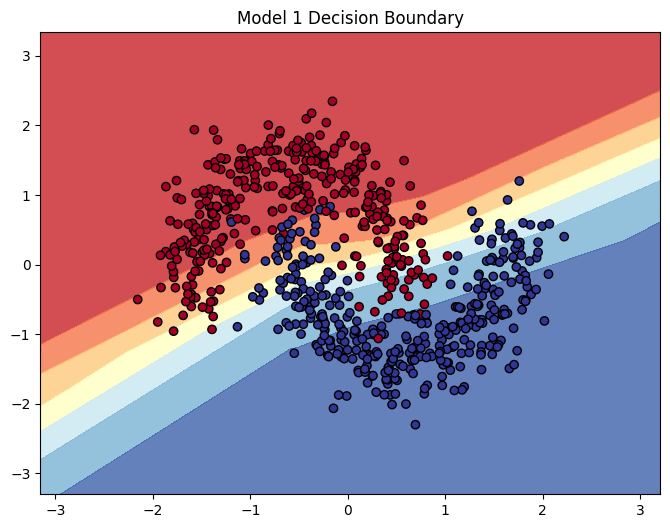

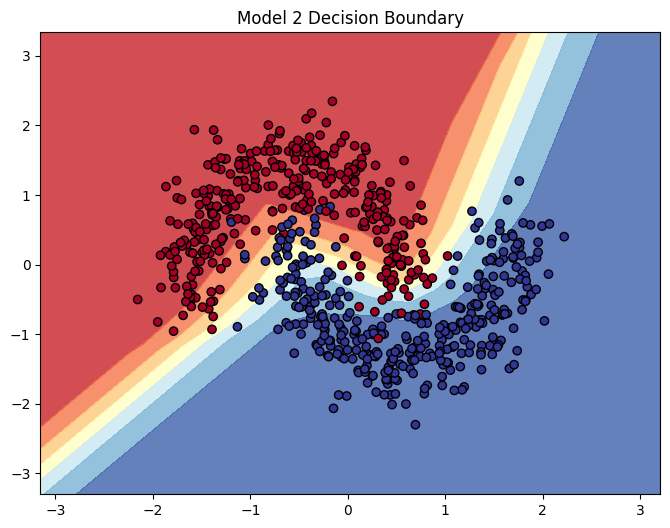

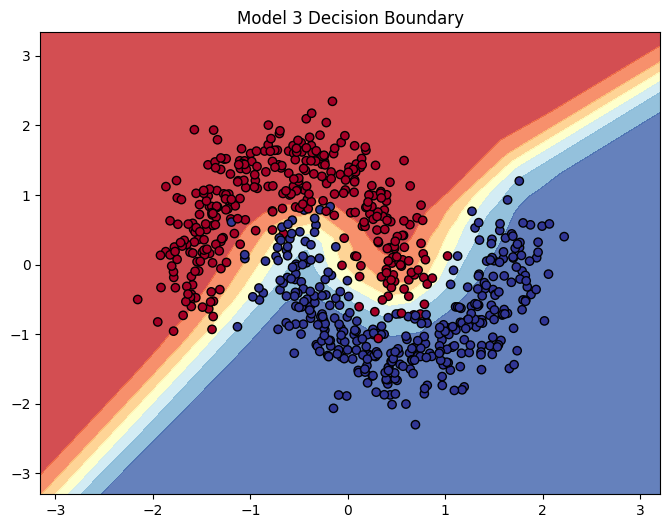

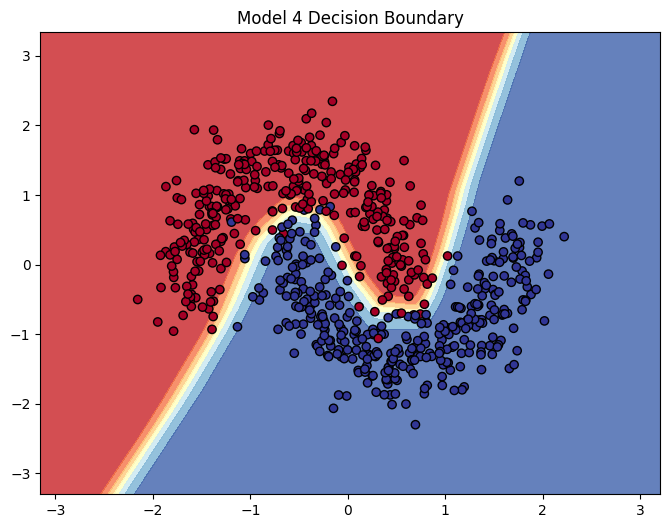

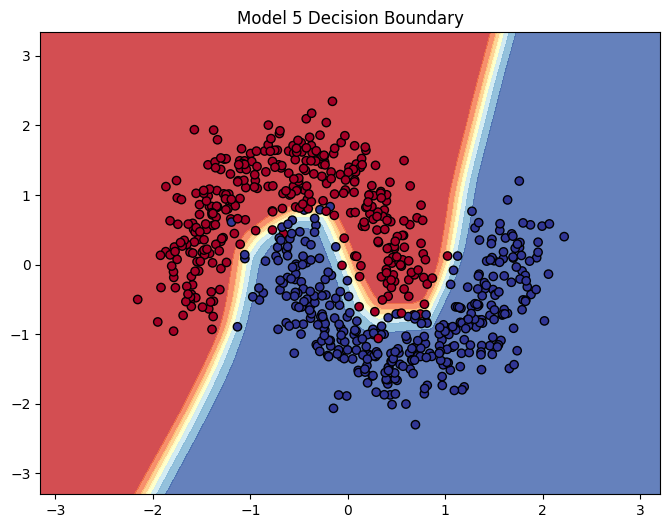

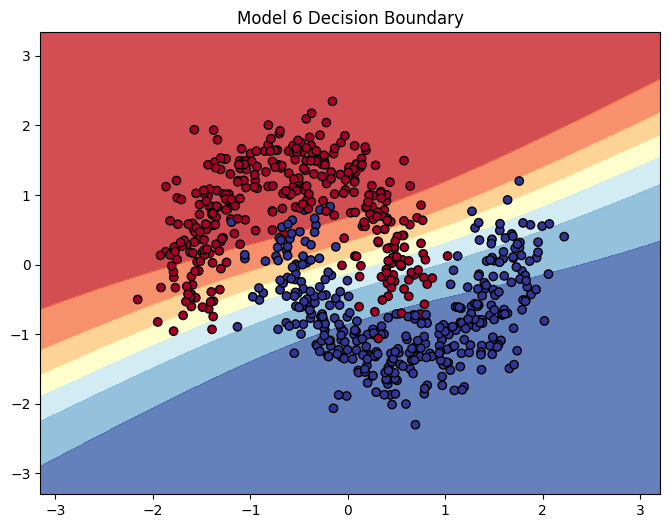

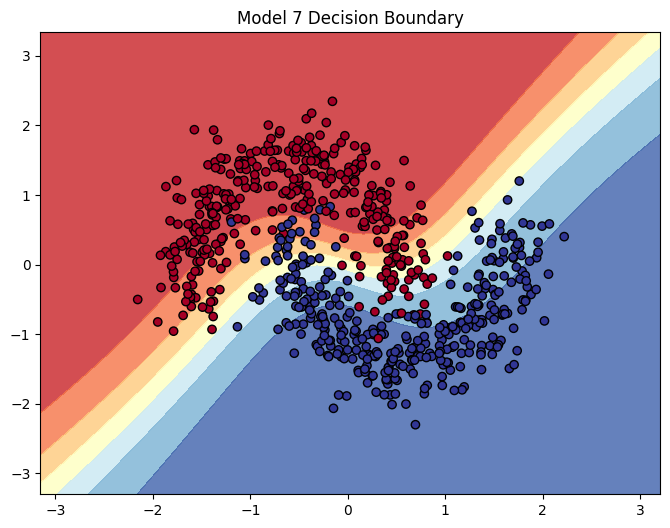

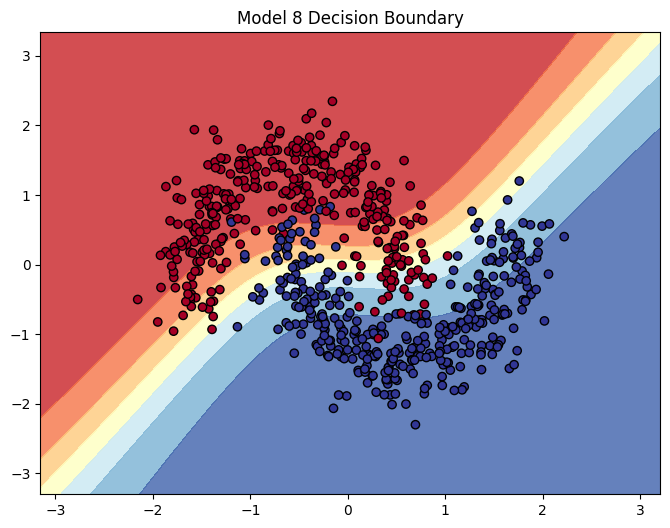

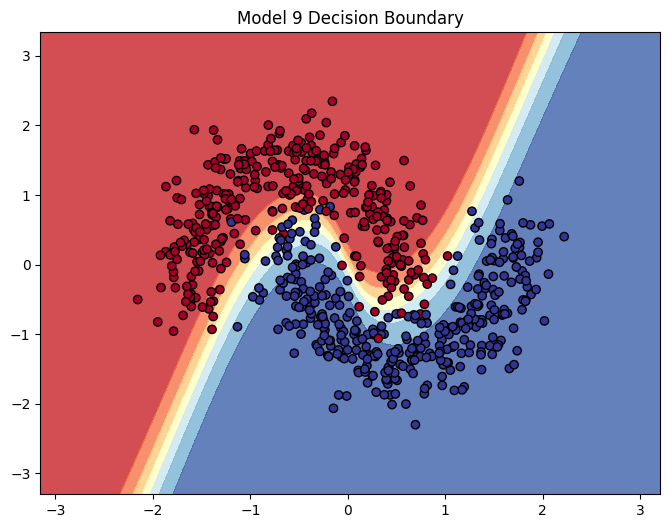

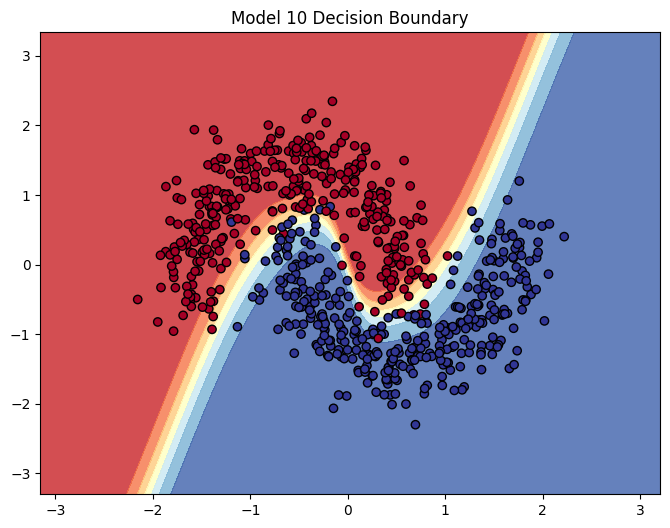

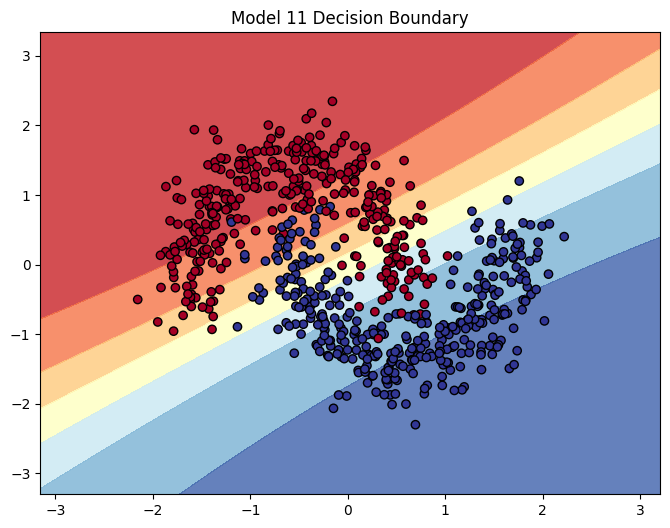

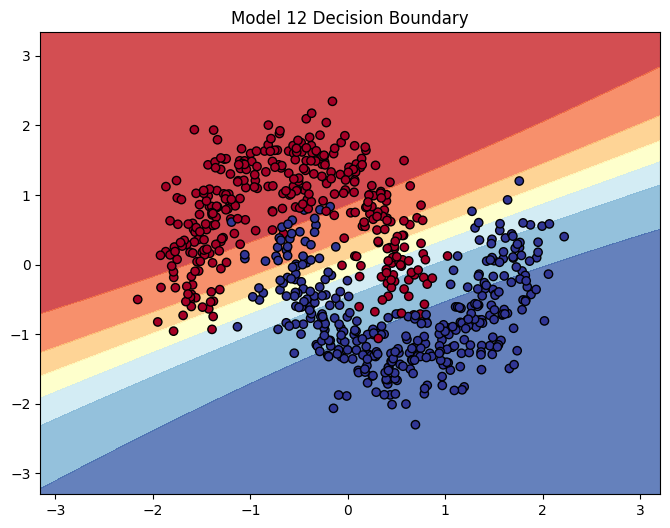

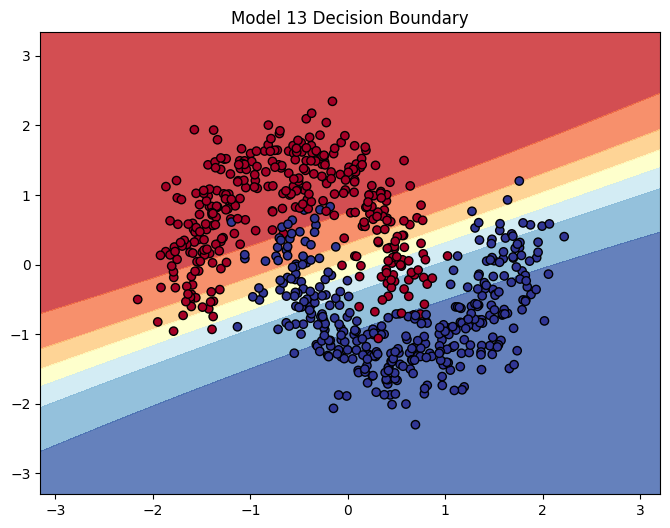

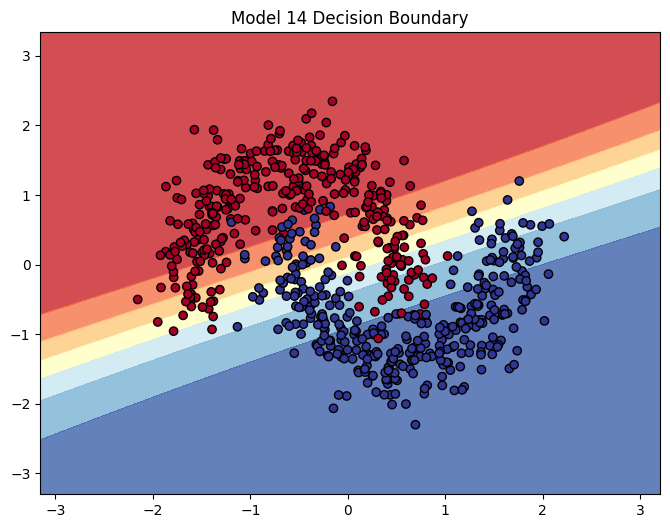

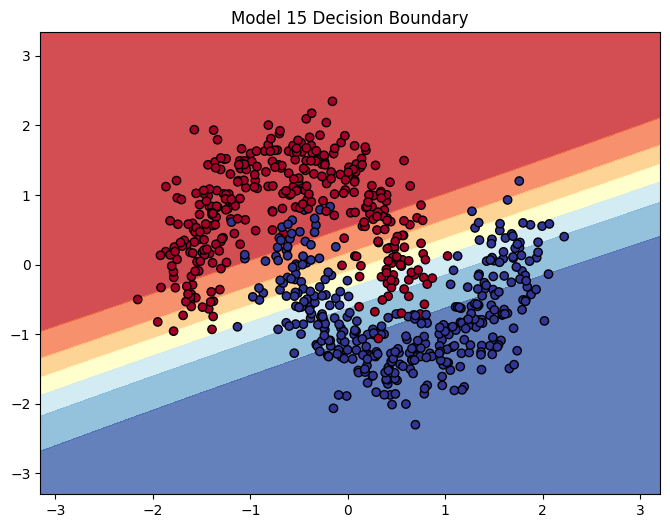

In [ ]:
# Plot decision boundary for each model
for i, result in enumerate(results):
    plt.figure(figsize=(8, 6))
    plot_decision_boundary(result['model'], X_train_scaled, y_train, title=f"Model {i+1} Decision Boundary")
    plt.show()